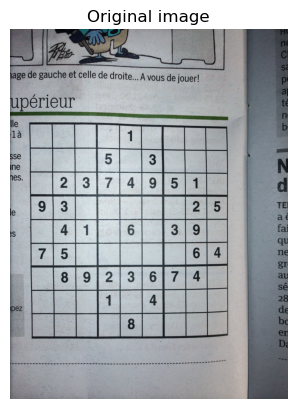

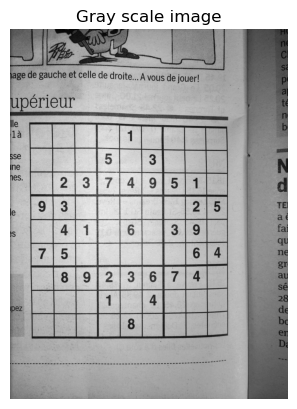

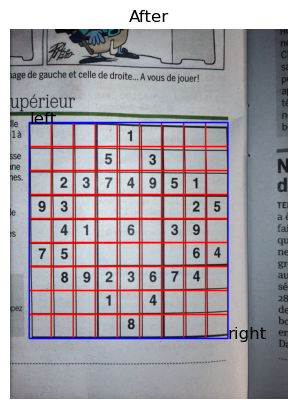

In [65]:
import cv2
import matplotlib.pyplot as plt
import math

file = "image1019"

# load original image
image = cv2.imread(f"images/{file}.jpg")
plt.axis("off")
plt.title("Original image")
plt.imshow(image)
plt.show()

# convert to gray scale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("Gray scale image")
plt.imshow(gray, cmap = "gray")
plt.show()

# use threshold to make gray scale image into binary image
ret, thresh = cv2.threshold(gray, 127, 255, 1)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# record all the rectangles contruct sudoku
x1 = y1 = math.inf
x2 = y2 = -math.inf
for contour in contours:
    # make contour into polygon
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    
    # abstract reatangle
    if (len(approx) == 4):
        cv2.drawContours(image, [contour], 0, (255, 0, 0), 5)
        
        # abstract the upper left point and lower right point
        length = max([a[0][0]] for a in approx)[0] - min([a[0][0]] for a in approx)[0]
        width = max([a[0][1]] for a in approx)[0] - min([a[0][1]] for a in approx)[0]
        if (length > 10 and width > 10):
            for a in approx:
                x1 = min(a[0][0], x1)
                y1 = min(a[0][1], y1)
                x2 = max(a[0][0], x2)
                y2 = max(a[0][1], y2)

# display the result
image = cv2.imread(f"images/{file}.jpg")
width = (x2 - x1) / 9
length = (y2 - y1) / 9
rectangles = []
for i in range(9):
    for j in range(9):
        upper_left_x = int(x1 + width * j)
        upper_left_y = int(y1 + length * i)
        lower_right_x = int(x1 + width * (j + 1))
        lower_right_y = int(y1 + length * (i + 1))
        cv2.rectangle(image, (upper_left_x, upper_left_y), (lower_right_x, lower_right_y), (255, 0, 0), 3)
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
plt.text(x1, y1, "left", fontsize = 12)
plt.text(x2, y2, "right", fontsize = 12)
plt.imshow(image)
plt.title("After")
plt.axis("off")
plt.show()

In [66]:
image = cv2.imread(f"images/{file}.jpg")
width = (x2 - x1) / 9
length = (y2 - y1) / 9
rectangles = []
for i in range(9):
    for j in range(9):
        upper_left_x = int(x1 + width * j)
        upper_left_y = int(y1 + length * i)
        lower_right_x = int(x1 + width * (j + 1))
        lower_right_y = int(y1 + length * (i + 1))
        temp = image[upper_left_y: lower_right_y, upper_left_x: lower_right_x]
        rectangles.append(temp)

In [67]:
label = []
with open(f"images/{file}.dat") as f:
    l = f.readlines()[2: ]
    for ll in l:
        for digit in ll[: -1].split(" "):
            if (digit.isnumeric()):
                label.append(digit)

print(label)

['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '5', '0', '3', '0', '0', '0', '0', '2', '3', '7', '4', '9', '5', '1', '0', '9', '3', '0', '0', '0', '0', '0', '2', '5', '0', '4', '1', '0', '6', '0', '3', '9', '0', '7', '5', '0', '0', '0', '0', '0', '6', '4', '0', '8', '9', '2', '3', '6', '7', '4', '0', '0', '0', '0', '1', '0', '4', '0', '0', '0', '0', '0', '0', '0', '8', '0', '0', '0', '0']


In [68]:
for i in range(81):
    temp = rectangles[i]
    temp = cv2.resize(temp, (28, 28), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(f"/Users/ming/Desktop/大四/電腦視覺/project/data/{label[i]}/image{id}.jpg", temp)
    id += 1

In [59]:
id = 0

In [60]:
import os

for i in range(10):
    os.mkdir(f"./data/{i}")